# Data Preprocessing

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the data
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

# Display first few rows of train data
train_df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [15]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


In [16]:
test_df.head()


,id,date,store,item
0,0,2018-01-01,1,1
1,1,2018-01-02,1,1
2,2,2018-01-03,1,1
3,3,2018-01-04,1,1
4,4,2018-01-05,1,1


In [17]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      45000 non-null  int64 
 1   date    45000 non-null  object
 2   store   45000 non-null  int64 
 3   item    45000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.4+ MB


In [18]:
# Check structure
print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)

Train shape: (913000, 4)
Test shape: (45000, 4)


In [19]:
# Check data types
train_df.dtypes

,0
date,object
store,int64
item,int64
sales,int64


In [20]:
test_df.dtypes

,0
id,int64
date,object
store,int64
item,int64


In [21]:
# Check for missing values in train and test sets
train_df.isnull().sum()


,0
date,0
store,0
item,0
sales,0


In [22]:
test_df.isnull().sum()

,0
id,0
date,0
store,0
item,0


In [23]:
# Numerical statistics
print("\nTrain Data - Descriptive Stats:")
print(train_df.describe())

# Categorical stats (for store/item)
print("\nUnique Stores:", train_df['store'].nunique())
print("Unique Items:", train_df['item'].nunique())


Train Data - Descriptive Stats:
               store           item          sales
count  913000.000000  913000.000000  913000.000000
mean        5.500000      25.500000      52.250287
std         2.872283      14.430878      28.801144
min         1.000000       1.000000       0.000000
25%         3.000000      13.000000      30.000000
50%         5.500000      25.500000      47.000000
75%         8.000000      38.000000      70.000000
max        10.000000      50.000000     231.000000

Unique Stores: 10
Unique Items: 50


In [24]:
# Convert 'date' from object to datetime
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

# Verify conversion
print("\nUpdated Train Data Types:")
print(train_df.dtypes)

print("\nUpdated Test Data Types:")
print(test_df.dtypes)


Updated Train Data Types:
date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

Updated Test Data Types:
id                int64
date     datetime64[ns]
store             int64
item              int64
dtype: object


In [25]:
# Date range analysis
print("Train Date Range:")
print("Start:", train_df['date'].min())
print("End:", train_df['date'].max())
print("\nTest Date Range:")
print("Start:", test_df['date'].min())
print("End:", test_df['date'].max())

# Check for missing dates in train data
date_range = pd.date_range(start=train_df['date'].min(), end=train_df['date'].max())
print("\nMissing dates in train data:", len(date_range) - train_df['date'].nunique())

Train Date Range:
Start: 2013-01-01 00:00:00
End: 2017-12-31 00:00:00

Test Date Range:
Start: 2018-01-01 00:00:00
End: 2018-03-31 00:00:00

Missing dates in train data: 0


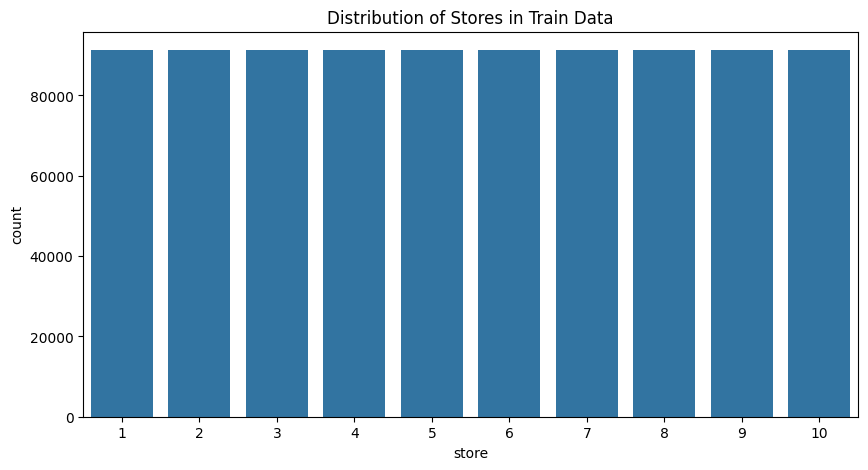


Stores in test data: [ 1  2  3  4  5  6  7  8  9 10]


In [26]:
# Store distribution
plt.figure(figsize=(10, 5))
sns.countplot(x='store', data=train_df)
plt.title("Distribution of Stores in Train Data")
plt.show()

# Stores in test data
print("\nStores in test data:", test_df['store'].unique())

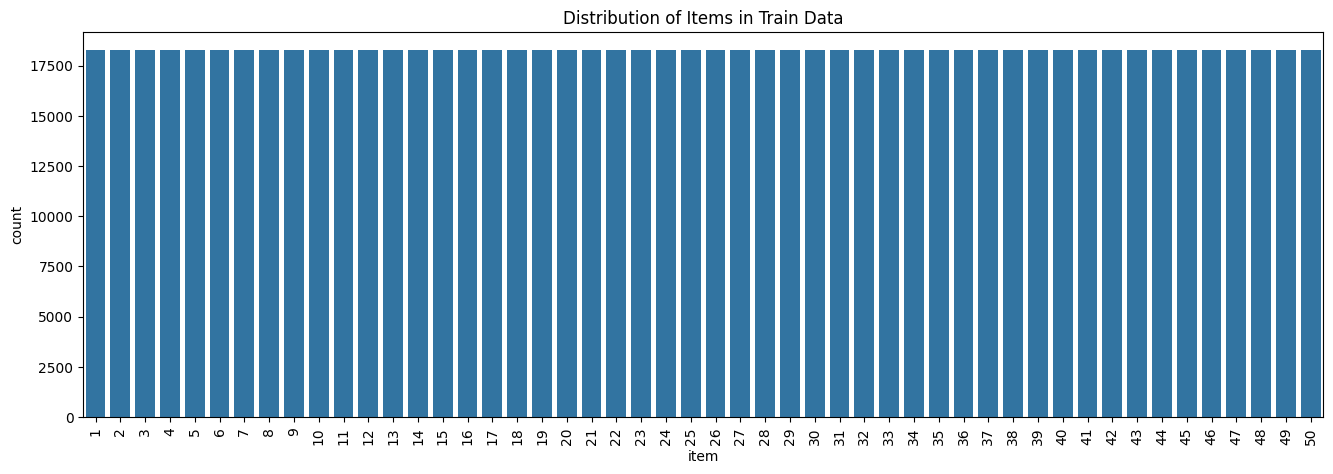


Items in test data: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]


In [27]:
# Item distribution
plt.figure(figsize=(16, 5))
sns.countplot(x='item', data=train_df)
plt.title("Distribution of Items in Train Data")
plt.xticks(rotation=90)
plt.show()

# Items in test data
print("\nItems in test data:", test_df['item'].unique())

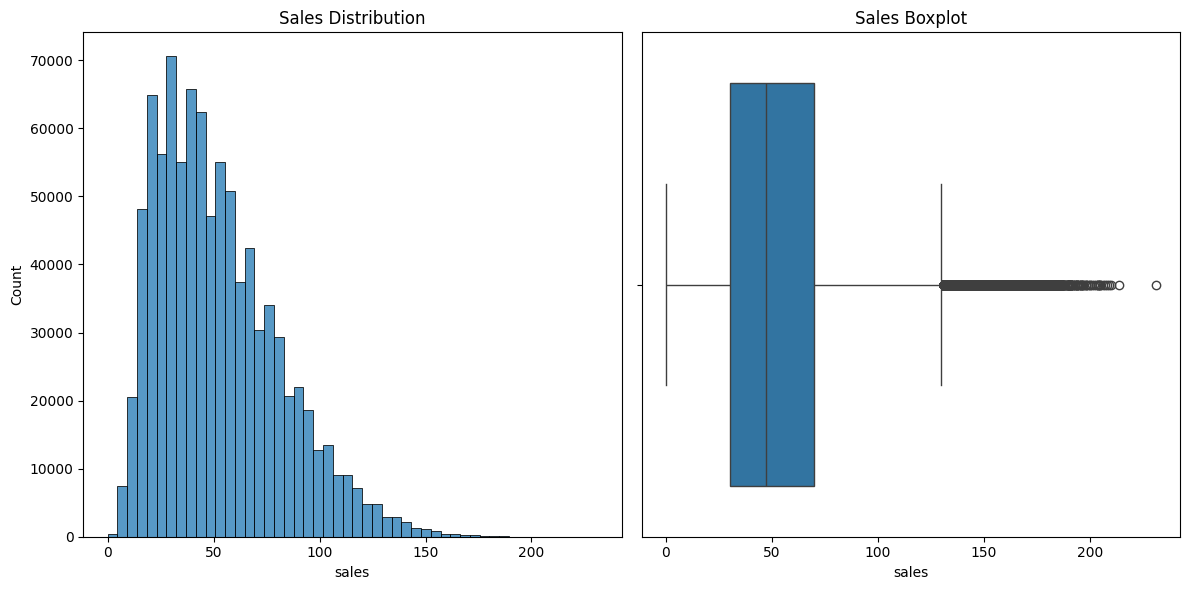


Sales Statistics:
count    913000.000000
mean         52.250287
std          28.801144
min           0.000000
25%          30.000000
50%          47.000000
75%          70.000000
max         231.000000
Name: sales, dtype: float64


In [28]:
# Sales distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(train_df['sales'], bins=50)
plt.title("Sales Distribution")

plt.subplot(1, 2, 2)
sns.boxplot(x=train_df['sales'])
plt.title("Sales Boxplot")
plt.tight_layout()
plt.show()

# Sales statistics
print("\nSales Statistics:")
print(train_df['sales'].describe())

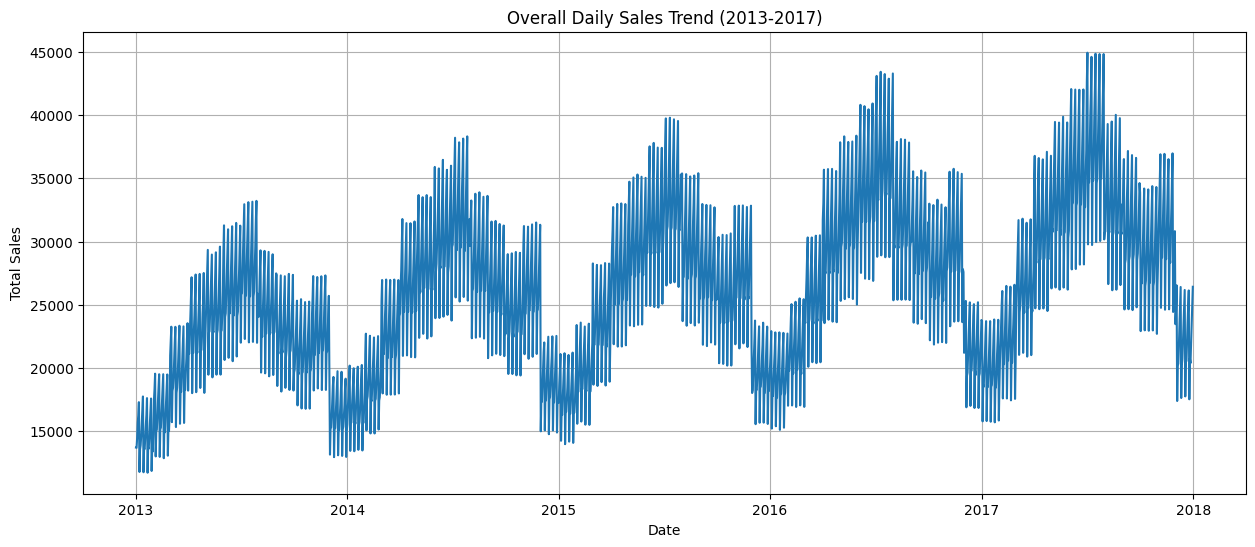

In [29]:
# Aggregate daily sales
daily_sales = train_df.groupby('date')['sales'].sum().reset_index()

plt.figure(figsize=(15, 6))
plt.plot(daily_sales['date'], daily_sales['sales'])
plt.title("Overall Daily Sales Trend (2013-2017)")
plt.xlabel("Date")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

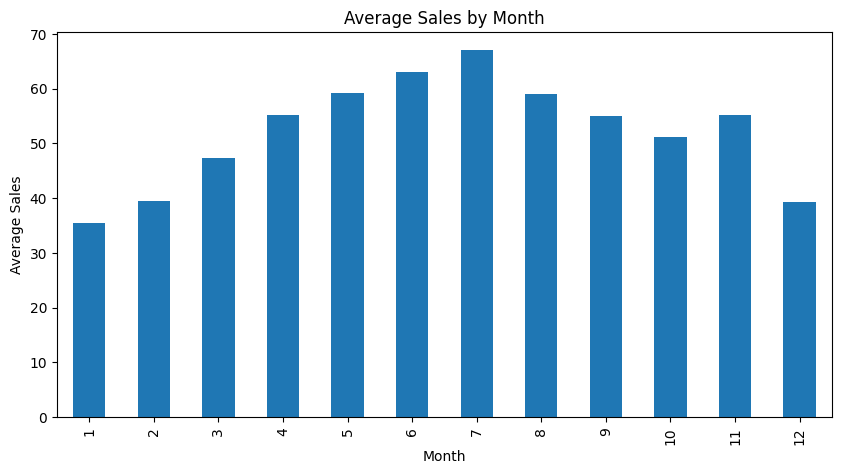

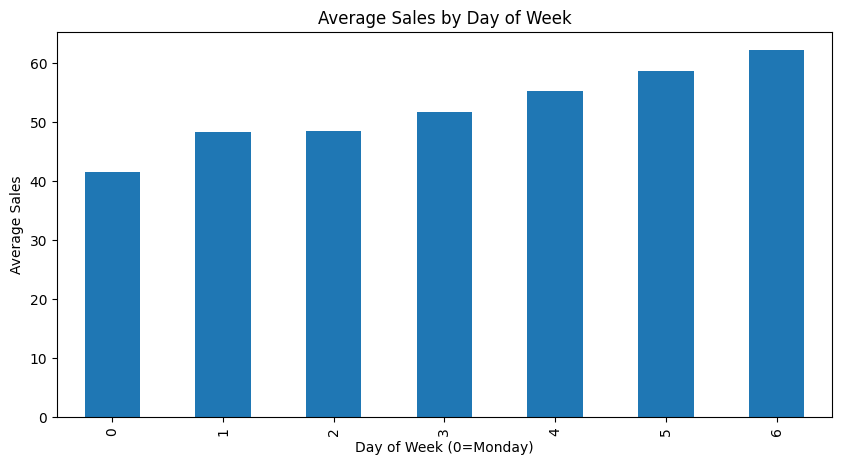

In [30]:
# Monthly seasonality
monthly_sales = train_df.groupby(train_df['date'].dt.month)['sales'].mean()
plt.figure(figsize=(10, 5))
monthly_sales.plot(kind='bar')
plt.title("Average Sales by Month")
plt.xlabel("Month")
plt.ylabel("Average Sales")
plt.show()

# Weekly seasonality
weekday_sales = train_df.groupby(train_df['date'].dt.dayofweek)['sales'].mean()
plt.figure(figsize=(10, 5))
weekday_sales.plot(kind='bar')
plt.title("Average Sales by Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Average Sales")
plt.show()

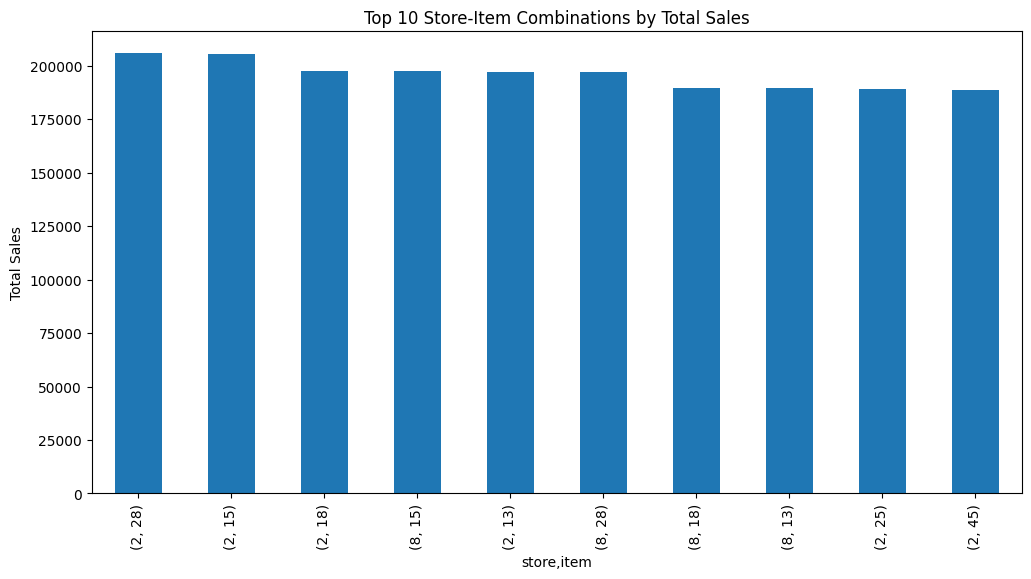

In [31]:
# Top 10 store-item combinations by total sales
top_combinations = train_df.groupby(['store', 'item'])['sales'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
top_combinations.plot(kind='bar')
plt.title("Top 10 Store-Item Combinations by Total Sales")
plt.ylabel("Total Sales")
plt.show()

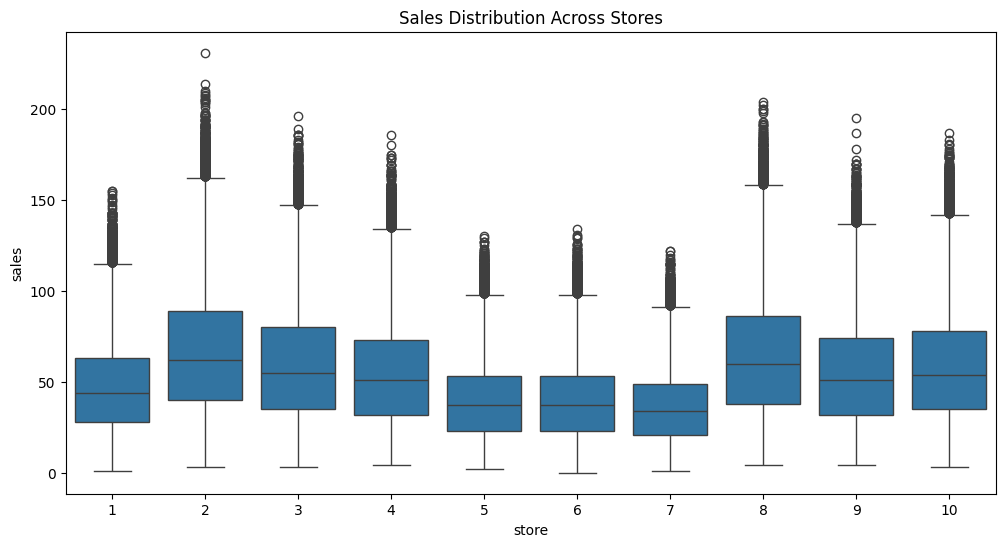

In [32]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='store', y='sales', data=train_df)
plt.title("Sales Distribution Across Stores")
plt.show()

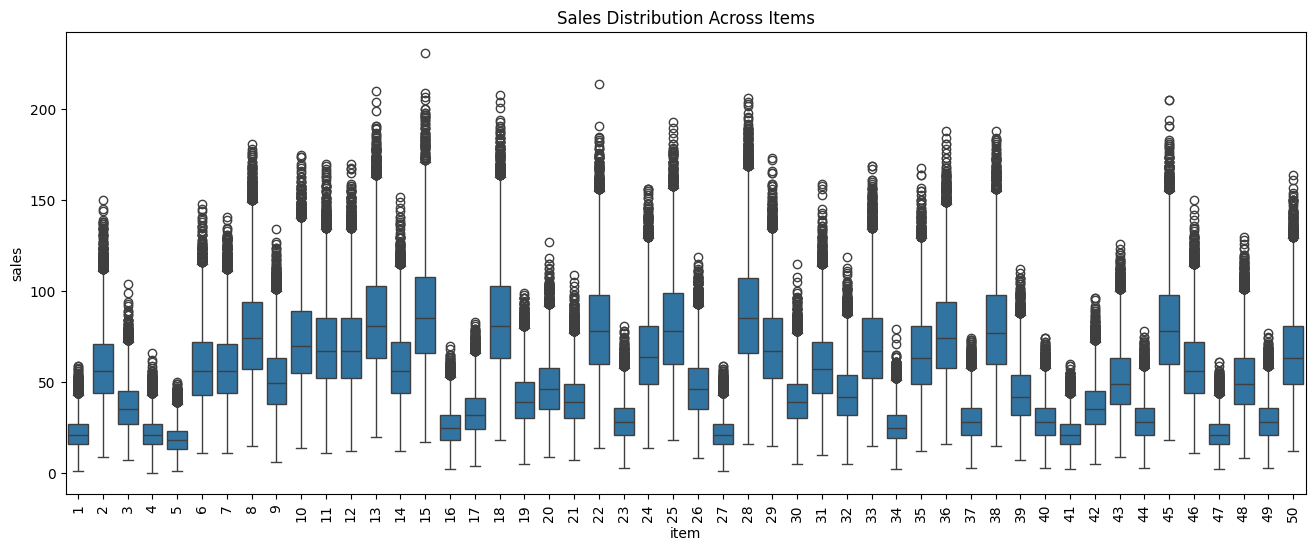

In [33]:
plt.figure(figsize=(16, 6))
sns.boxplot(x='item', y='sales', data=train_df)
plt.title("Sales Distribution Across Items")
plt.xticks(rotation=90)
plt.show()

In [34]:
# Verify all stores and items in test exist in train
print("\nStores in test but not in train:", set(test_df['store']) - set(train_df['store']))
print("Items in test but not in train:", set(test_df['item']) - set(train_df['item']))

# Check date overlap
print("\nDate overlap between train and test:",
      "Yes" if train_df['date'].max() >= test_df['date'].min() else "No")


Stores in test but not in train: set()
Items in test but not in train: set()

Date overlap between train and test: No


<Figure size 1600x1200 with 0 Axes>

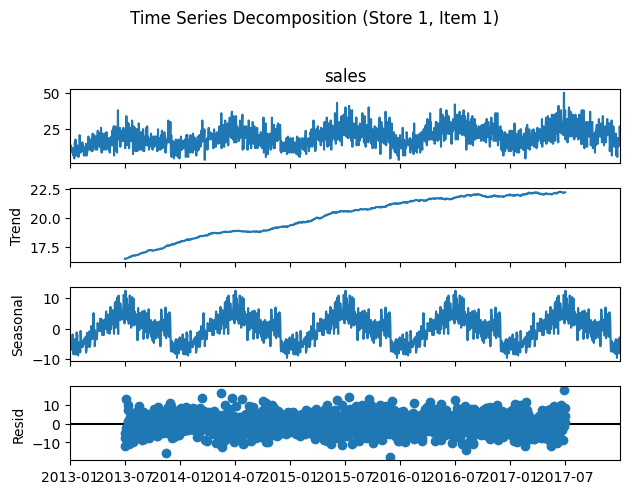

In [35]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Select a sample store-item pair
sample = train_df[(train_df['store'] == 1) & (train_df['item'] == 1)].set_index('date')['sales']

# Decompose the time series
result = seasonal_decompose(sample, model='additive', period=365)
plt.figure(figsize=(16, 12))
result.plot()
plt.suptitle('Time Series Decomposition (Store 1, Item 1)', y=1.02)
plt.tight_layout()
plt.show()

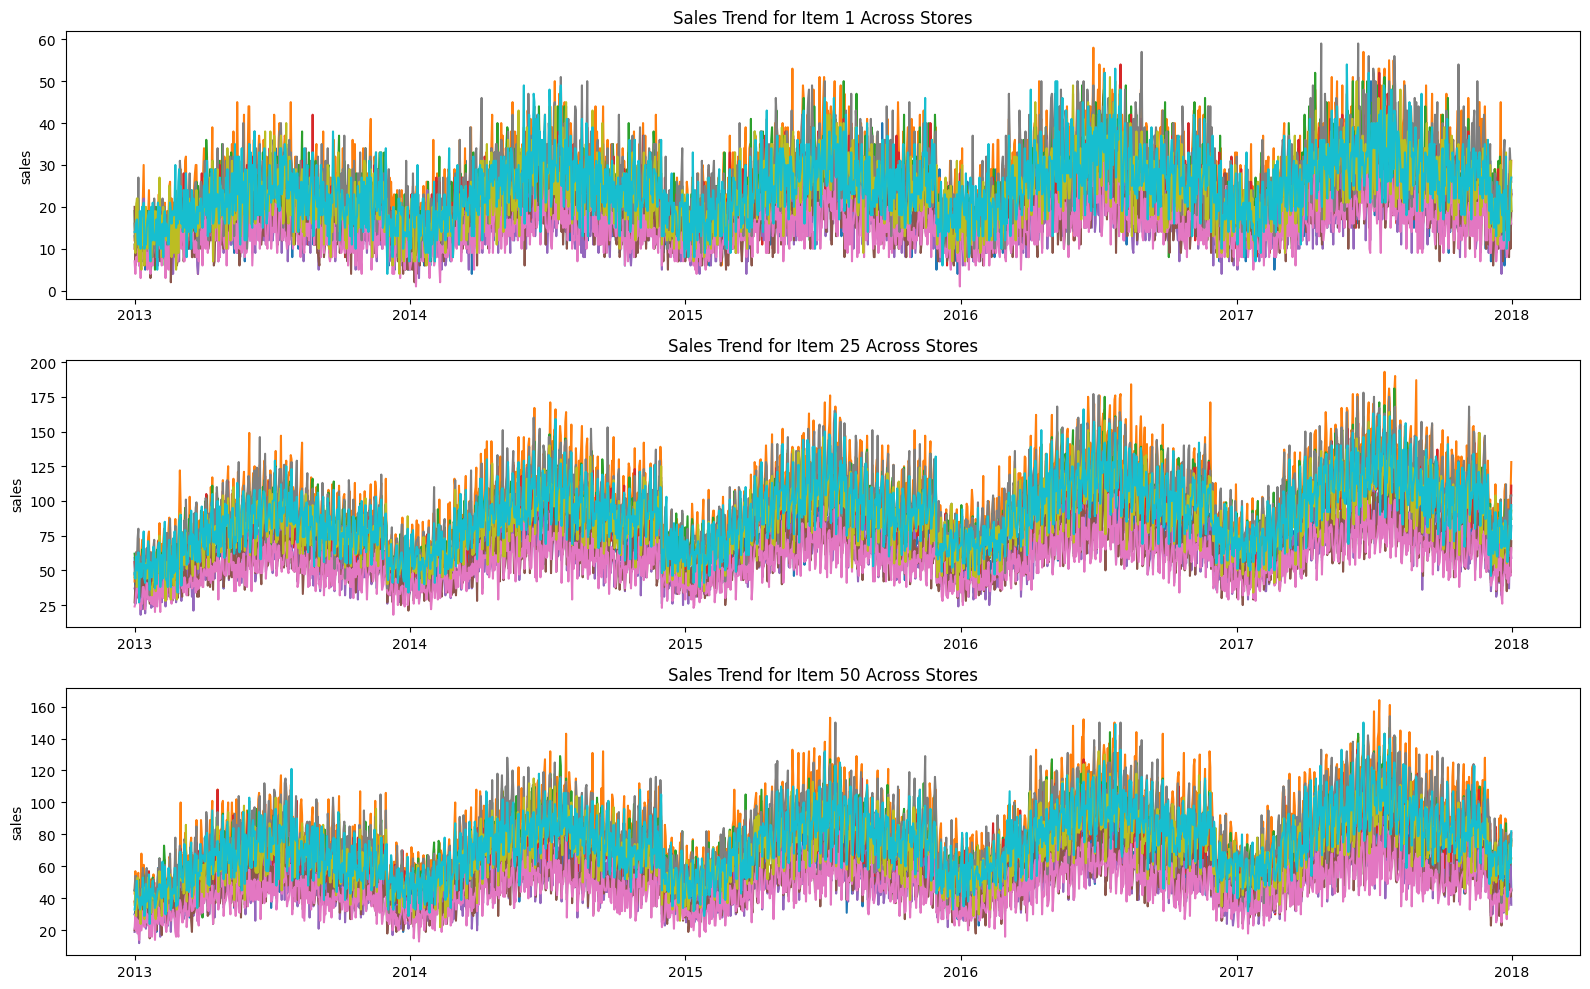

In [36]:
# Select 3 items and plot their sales across all stores
items_to_analyze = [1, 25, 50]
plt.figure(figsize=(16, 10))

for i, item in enumerate(items_to_analyze, 1):
    plt.subplot(3, 1, i)
    item_data = train_df[train_df['item'] == item]
    sns.lineplot(x='date', y='sales', hue='store', data=item_data, palette='tab10', legend=False)
    plt.title(f'Sales Trend for Item {item} Across Stores')
    plt.xlabel('')

plt.tight_layout()
plt.show()

# Feature Engineering

In [37]:
def create_advanced_features(df, is_test=False):
    df = df.copy()

    # Time-based features
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['week'] = df['date'].dt.isocalendar().week
    df['dayofweek'] = df['date'].dt.dayofweek
    df['dayofyear'] = df['date'].dt.dayofyear
    df['is_weekend'] = df['dayofweek'].isin([5, 6]).astype(int)

    if not is_test:
        # Only create lag/diff/rolling features for train data
        df['lag_7'] = df.groupby(['store', 'item'])['sales'].shift(7)
        df['lag_28'] = df.groupby(['store', 'item'])['sales'].shift(28)
        df['rolling_7_mean'] = df.groupby(['store', 'item'])['sales'].transform(lambda x: x.rolling(7).mean())
        df['rolling_28_mean'] = df.groupby(['store', 'item'])['sales'].transform(lambda x: x.rolling(28).mean())
        df['diff_7'] = df.groupby(['store', 'item'])['sales'].diff(7)
        df['diff_28'] = df.groupby(['store', 'item'])['sales'].diff(28)

    return df

# Apply to both datasets
train_fe = create_advanced_features(train_df, is_test=False)
test_fe = create_advanced_features(test_df, is_test=True)

# Display the results
print("Train Features:")
print(train_fe[['date', 'store', 'item', 'sales', 'lag_7', 'rolling_7_mean']].head())
print("\nTest Features:")
print(test_fe.head())

Train Features:
        date  store  item  sales  lag_7  rolling_7_mean
0 2013-01-01      1     1     13    NaN             NaN
1 2013-01-02      1     1     11    NaN             NaN
2 2013-01-03      1     1     14    NaN             NaN
3 2013-01-04      1     1     13    NaN             NaN
4 2013-01-05      1     1     10    NaN             NaN

Test Features:
   id       date  store  item  year  month  week  dayofweek  dayofyear  \
0   0 2018-01-01      1     1  2018      1     1          0          1   
1   1 2018-01-02      1     1  2018      1     1          1          2   
2   2 2018-01-03      1     1  2018      1     1          2          3   
3   3 2018-01-04      1     1  2018      1     1          3          4   
4   4 2018-01-05      1     1  2018      1     1          4          5   

   is_weekend  
0           0  
1           0  
2           0  
3           0  
4           0  


In [38]:
# Combine train and test for complete history (optional approach)
full_df = pd.concat([train_df, test_df.assign(sales=np.nan)]).sort_values(['store', 'item', 'date'])

# Create features on full history
full_fe = create_advanced_features(full_df, is_test=False)

# Split back into train and test
train_fe = full_fe[full_fe['date'] <= train_df['date'].max()]
test_fe = full_fe[full_fe['date'] > train_df['date'].max()]

print("\nTest Features with Lags:")
print(test_fe[['date', 'store', 'item', 'lag_7', 'rolling_7_mean']].head())


Test Features with Lags:
        date  store  item  lag_7  rolling_7_mean
0 2018-01-01      1     1   13.0             NaN
1 2018-01-02      1     1   16.0             NaN
2 2018-01-03      1     1   14.0             NaN
3 2018-01-04      1     1   19.0             NaN
4 2018-01-05      1     1   15.0             NaN


In [39]:
# Convert dates (though your data shows they're already datetime)
train_df['date'] = pd.to_datetime(train_df['date'])
test_df['date'] = pd.to_datetime(test_df['date'])

# Verify date ranges
print(f"Train date range: {train_df['date'].min()} to {train_df['date'].max()}")
print(f"Test date range: {test_df['date'].min()} to {test_df['date'].max()}")

# Create validation split (last 90 days)
val_cutoff = train_df['date'].max() - pd.Timedelta(days=90)
train_set = train_df[train_df['date'] <= val_cutoff]
val_set = train_df[train_df['date'] > val_cutoff]

print(f"\nTrain size: {len(train_set):,} (until {val_cutoff.date()})")
print(f"Validation size: {len(val_set):,} (last 90 days)")

Train date range: 2013-01-01 00:00:00 to 2017-12-31 00:00:00
Test date range: 2018-01-01 00:00:00 to 2018-03-31 00:00:00

Train size: 868,000 (until 2017-10-02)
Validation size: 45,000 (last 90 days)


In [40]:
def create_features(df):
    df = df.copy()

    # Time features
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['dayofweek'] = df['date'].dt.dayofweek
    df['is_weekend'] = df['dayofweek'].isin([5,6]).astype(int)

    # Only create lags for training data
    if 'sales' in df.columns:
        df['lag_7'] = df.groupby(['store','item'])['sales'].shift(7)
        df['lag_28'] = df.groupby(['store','item'])['sales'].shift(28)
        df['rolling_7_mean'] = df.groupby(['store','item'])['sales'].transform(lambda x: x.rolling(7, min_periods=1).mean())

    return df

# Apply feature engineering
train_fe = create_features(train_set)
val_fe = create_features(val_set)
test_fe = create_features(test_df)

# Drop rows with missing values (from lag features)
train_fe = train_fe.dropna()
val_fe = val_fe.dropna()

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit

# Feature columns
features = ['store', 'item', 'year', 'month', 'dayofweek', 'is_weekend',
            'lag_7', 'lag_28', 'rolling_7_mean']
target = 'sales'

# Prepare data
X_train = train_fe[features]
y_train = train_fe[target]
X_val = val_fe[features]
y_val = val_fe[target]

# Time-series cross-validation
tscv = TimeSeriesSplit(n_splits=3)

# Training Model


In [42]:
def create_advanced_features(df):
    df = df.copy()

    # Time features
    df['year'] = df['date'].dt.year
    df['month'] = df['date'].dt.month
    df['weekofyear'] = df['date'].dt.isocalendar().week
    df['dayofweek'] = df['date'].dt.dayofweek
    df['dayofyear'] = df['date'].dt.dayofyear
    df['is_weekend'] = df['dayofweek'].isin([5,6]).astype(int)
    df['quarter'] = df['date'].dt.quarter
    df['days_in_month'] = df['date'].dt.days_in_month

    # Lag features
    if 'sales' in df.columns:
        for lag in [1, 7, 14, 28, 56, 90]:
            df[f'lag_{lag}'] = df.groupby(['store','item'])['sales'].shift(lag)

        # Rolling statistics
        for window in [7, 14, 28, 56]:
            df[f'rolling_{window}_mean'] = df.groupby(['store','item'])['sales'].transform(
                lambda x: x.rolling(window, min_periods=1).mean())
            df[f'rolling_{window}_std'] = df.groupby(['store','item'])['sales'].transform(
                lambda x: x.rolling(window, min_periods=1).std())

    return df

# Apply to datasets
train_fe = create_advanced_features(train_df)
test_fe = create_advanced_features(test_df)

In [43]:
# Last 3 months for validation
val_cutoff = train_fe['date'].max() - pd.Timedelta(days=90)
train_set = train_fe[train_fe['date'] <= val_cutoff].dropna()
val_set = train_fe[train_fe['date'] > val_cutoff].dropna()

# Feature selection
features = [col for col in train_set.columns if col not in ['date', 'sales', 'id']]
target = 'sales'

X_train = train_set[features]
y_train = train_set[target]
X_val = val_set[features]
y_val = val_set[target]

In [44]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
import xgboost as xgb
from sklearn.metrics import mean_absolute_error

# Define search space
space = {
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
    'gamma': hp.uniform('gamma', 0, 1),
    'n_estimators': hp.quniform('n_estimators', 50, 500, 50)
}

def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'learning_rate': params['learning_rate'],
        'subsample': params['subsample'],
        'colsample_bytree': params['colsample_bytree'],
        'min_child_weight': params['min_child_weight'],
        'gamma': params['gamma'],
        'n_estimators': int(params['n_estimators'])
    }

    model = xgb.XGBRegressor(
        **params,
        random_state=42,
        early_stopping_rounds=50,
        eval_metric='mae'
    )

    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=False
    )

    val_pred = model.predict(X_val)
    mae = mean_absolute_error(y_val, val_pred)

    return {'loss': mae, 'status': STATUS_OK}

# Run optimization
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

# Get best parameters
best_params = {
    'max_depth': int(best['max_depth']),
    'learning_rate': best['learning_rate'],
    'subsample': best['subsample'],
    'colsample_bytree': best['colsample_bytree'],
    'min_child_weight': best['min_child_weight'],
    'gamma': best['gamma'],
    'n_estimators': int(best['n_estimators'])
}

print("Best parameters found:")
print(best_params)

100%|██████████| 50/50 [24:48<00:00, 29.77s/trial, best loss: 4.863220691680908]
Best parameters found:
{'max_depth': 7, 'learning_rate': np.float64(0.1017091652802491), 'subsample': np.float64(0.9290807887539206), 'colsample_bytree': np.float64(0.9692284429182223), 'min_child_weight': np.float64(8.0), 'gamma': np.float64(0.09807654639547914), 'n_estimators': 300}


[0]	validation_0-mae:20.82016
[1]	validation_0-mae:18.85787
[2]	validation_0-mae:17.11287
[3]	validation_0-mae:15.58754
[4]	validation_0-mae:14.21186
[5]	validation_0-mae:13.00031
[6]	validation_0-mae:11.92776
[7]	validation_0-mae:10.98677
[8]	validation_0-mae:10.16602
[9]	validation_0-mae:9.45251
[10]	validation_0-mae:8.83249
[11]	validation_0-mae:8.29696
[12]	validation_0-mae:7.83819
[13]	validation_0-mae:7.44244
[14]	validation_0-mae:7.11158
[15]	validation_0-mae:6.82305
[16]	validation_0-mae:6.58002
[17]	validation_0-mae:6.37549
[18]	validation_0-mae:6.19554
[19]	validation_0-mae:6.04682
[20]	validation_0-mae:5.91254
[21]	validation_0-mae:5.80311
[22]	validation_0-mae:5.71165
[23]	validation_0-mae:5.63624
[24]	validation_0-mae:5.56235
[25]	validation_0-mae:5.50794
[26]	validation_0-mae:5.45906
[27]	validation_0-mae:5.42051
[28]	validation_0-mae:5.37925
[29]	validation_0-mae:5.35054
[30]	validation_0-mae:5.31742
[31]	validation_0-mae:5.28725
[32]	validation_0-mae:5.26059
[33]	valida

<Figure size 1200x800 with 0 Axes>

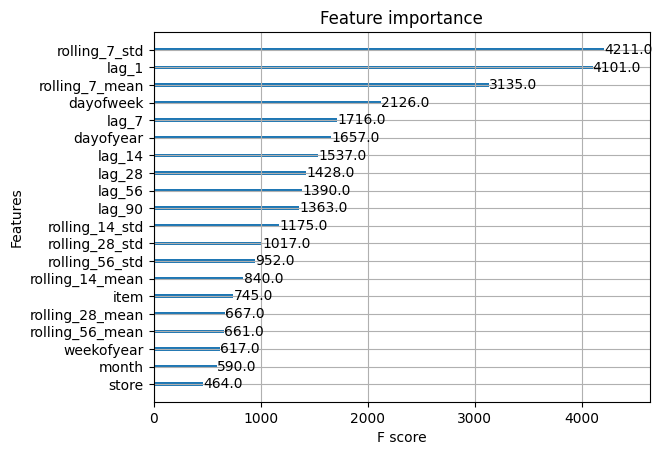

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

final_model = xgb.XGBRegressor(
    **best_params,
    random_state=42,
    early_stopping_rounds=50,
    eval_metric='mae'
)

final_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    verbose=True
)

# Evaluate
val_pred = final_model.predict(X_val)
print(f"Final Validation MAE: {mean_absolute_error(y_val, val_pred):.2f}")
print(f"Final Validation RMSE: {np.sqrt(mean_squared_error(y_val, val_pred)):.2f}")

# Feature importance
plt.figure(figsize=(12, 8))
xgb.plot_importance(final_model, max_num_features=20)
plt.show()